# Injury/Fatalities by Time of Day

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
accident_data = pd.read_csv('transformed.csv')

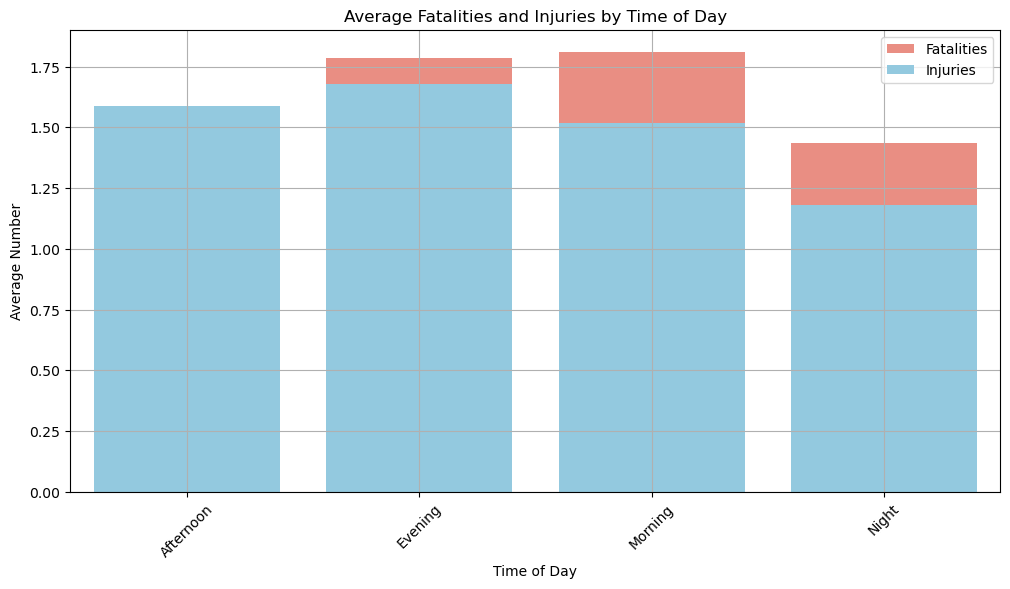

In [11]:
# Cleaning and preparing 'time' and 'injured' columns
accident_data['time'] = accident_data['time'].astype(str).str.strip().str.capitalize()
accident_data['injured'] = pd.to_numeric(accident_data['injured'], errors='coerce')

# Filling missing values in 'fatalities' and 'injured' with 0 for aggregation purposes
accident_data['fatalities'].fillna(0, inplace=True)
accident_data['injured'].fillna(0, inplace=True)

# Aggregating data to find the mean number of fatalities and injuries per time of day
time_severity_df = accident_data.groupby('time').agg({
    'fatalities': 'mean',
    'injured': 'mean'
}).reset_index()

# Excluding entries where time is not specified (i.e., 'nan')
time_severity_df = time_severity_df[time_severity_df['time'] != 'Nan']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='time', y='fatalities', data=time_severity_df, color='salmon', label='Fatalities')
sns.barplot(x='time', y='injured', data=time_severity_df, color='skyblue', label='Injuries')
plt.title('Average Fatalities and Injuries by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Statistical Test

In [16]:
from scipy.stats import kruskal

# Kruskal-Wallis Test
# Aggregating the data for the test
fatalities_test_data = [accident_data.loc[accident_data['time'] == time, 'fatalities'] for time in time_severity_df['time']]
injuries_test_data = [accident_data.loc[accident_data['time'] == time, 'injured'] for time in time_severity_df['time']]

# Performing the Kruskal-Wallis test
fatalities_stat, fatalities_p = kruskal(*fatalities_test_data)
injuries_stat, injuries_p = kruskal(*injuries_test_data)

fatalities_stat, fatalities_p, injuries_stat, injuries_p

(19.268404582189792,
 0.00024059261808187182,
 2.938663134213311,
 0.4011791152270835)

# 

In [23]:
import pandas as pd

# Load the CSV file into a DataFrame
# Display basic information and the first few rows of the DataFrame
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6750 non-null   int64  
 1   place                6697 non-null   object 
 2   link                 6750 non-null   object 
 3   content              6750 non-null   object 
 4   news_date            6750 non-null   object 
 5   first_line           6750 non-null   object 
 6   latitude             6595 non-null   float64
 7   longitude            6595 non-null   float64
 8   state                6485 non-null   object 
 9   week_avg_weather     6595 non-null   float64
 10  precipitation_3days  6595 non-null   float64
 11  age                  1818 non-null   object 
 12  vehicle_type         4977 non-null   object 
 13  reason               1880 non-null   object 
 14  fatalities           3258 non-null   float64
 15  injured              2022 non-null   f

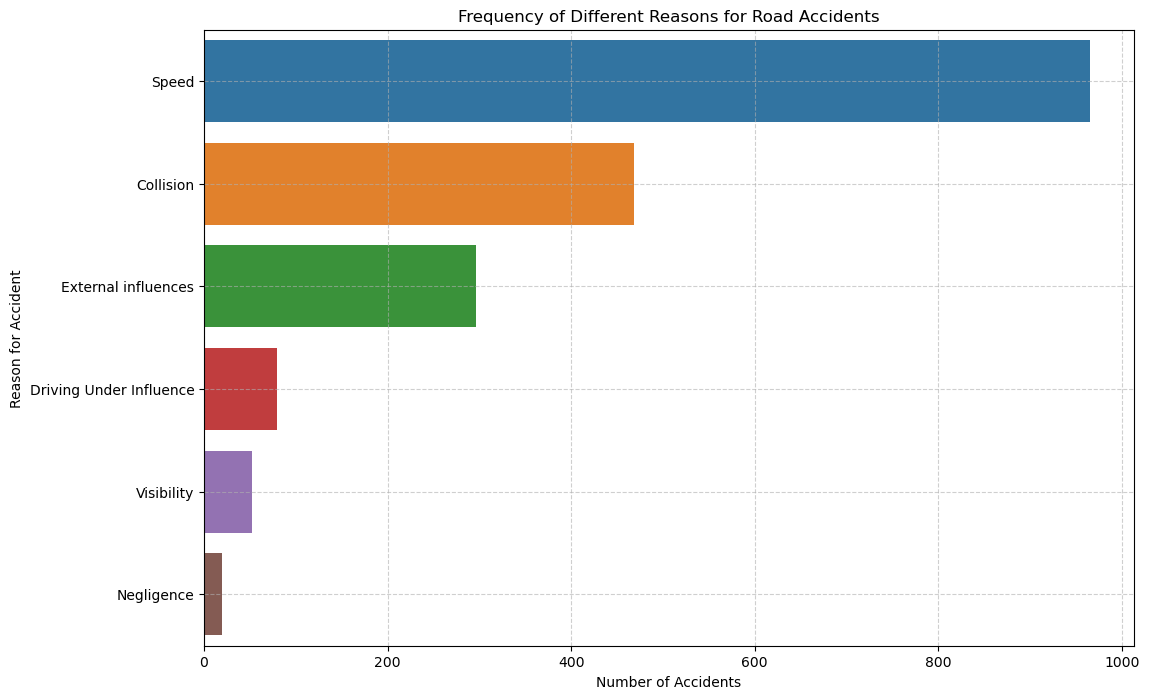

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation for analysis of accident reasons
reasons_data = accident_data['reason'].dropna()

# Plotting the distribution of accident reasons
plt.figure(figsize=(12, 8))
sns.countplot(y=reasons_data, order=reasons_data.value_counts().index)
plt.title('Frequency of Different Reasons for Road Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Reason for Accident')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()